In [1]:
import numpy as np
import pandas as pd

In [2]:
#1.1 데이터 불러오기

data = pd.read_csv("C:/Users/samsung/Desktop/PSAT/4주차 패키지/주제분석 1주차/data.csv")

In [3]:
# 1.2 데이터 확인
print(data.shape)
data.head()
data.info()
pd.isnull(data)

(1216553, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory u

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,False,False,False,False,False,False,False,False,False,False,False,False,False
1216549,False,False,False,False,False,False,False,False,False,False,False,False,False
1216550,False,False,False,False,False,False,False,False,False,False,False,False,False
1216551,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# 1.3 불필요한 행 삭제

data = data.drop(data[data['city']=='부산광역시'].index, axis = 0)
data = data.reset_index()
data.head()

,index,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
# 1.4 변수 이름 바꾸기

data= data.rename({'transaction_real_price' : 'price'}, axis='columns')
data.head()

,index,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price
0,0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [6]:
#1.5 불필요한 변수 삭제

data = data.drop(['transaction_id', 'apartment_id', 'jibun', 'city'], axis='columns')
print(data.shape)

(742285, 10)


In [7]:
#1.6 연/월 뽑기

data = data.astype({'transaction_year_month':'str'})
data['transaction_year'] = data['transaction_year_month'].str.slice(start=0, stop=4)
data['transaction_month'] = data['transaction_year_month'].str.slice(start=4, stop=6)
data.head()

,index,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,0,신교동,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,01
1,1,필운동,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,01
2,2,필운동,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,01
3,3,내수동,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,01
4,4,내수동,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,01


In [8]:
#1.7 필요 연도 뽑기
data = data.astype({'transaction_year':'int'})
year_idx = (data.transaction_year >=  2012)
data = data.loc[year_idx,:]
data = data.reset_index()
data.head()

,level_0,index,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month
0,1770,1770,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,1~10,6,70000,2012,01
1,1771,1771,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,11~20,11,100500,2012,01
2,1772,1772,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,11~20,1,65800,2012,01
3,1773,1773,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,1~10,8,30500,2012,01
4,1774,1774,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,21~31,15,30500,2012,01


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

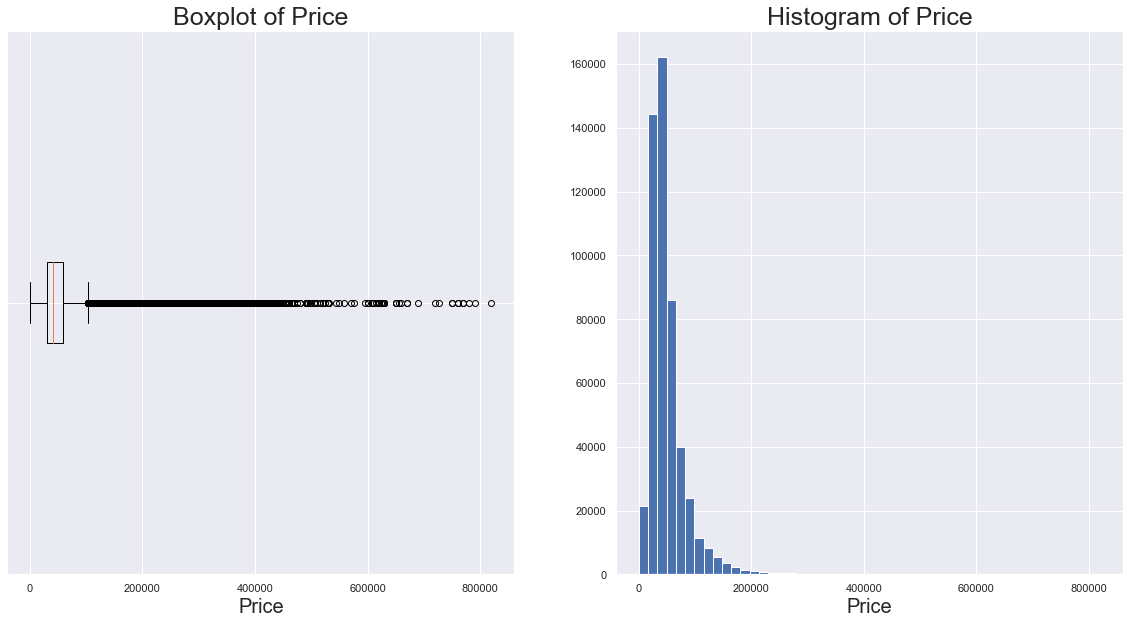

In [10]:
#2-1. 거래가격 분포 확인

sns.set(font_scale=1)
firstplot = plt.figure(figsize=(20,10))
axes1 = firstplot.add_subplot(1,2,1)
axes2 = firstplot.add_subplot(1,2,2)
axes1.boxplot(data.price, vert=False)
axes2.hist(data.price, bins=50)
axes1.set_title('Boxplot of Price', fontsize=25)
axes2.set_title('Histogram of Price', fontsize=25)
axes1.set_xlabel('Price', fontsize=20)
axes2.set_xlabel('Price', fontsize=20)
axes1.set(yticklabels=[])
plt.show()

In [11]:
'''주어진 데이터에서 거래된 아파트의 가격대가 0-150000사이에 대부분 존재하고 그보다 높은 가격에 거래된 표본들은 outlier임을 의미합니다. 이는 히스토그램을 통해서도 확인할 수 있습니다.'''


'주어진 데이터에서 거래된 아파트의 가격대가 0-150000사이에 대부분 존재하고 그보다 높은 가격에 거래된 표본들은 outlier임을 의미합니다. 이는 히스토그램을 통해서도 확인할 수 있습니다.'

Text(0.5, 0, 'Price')

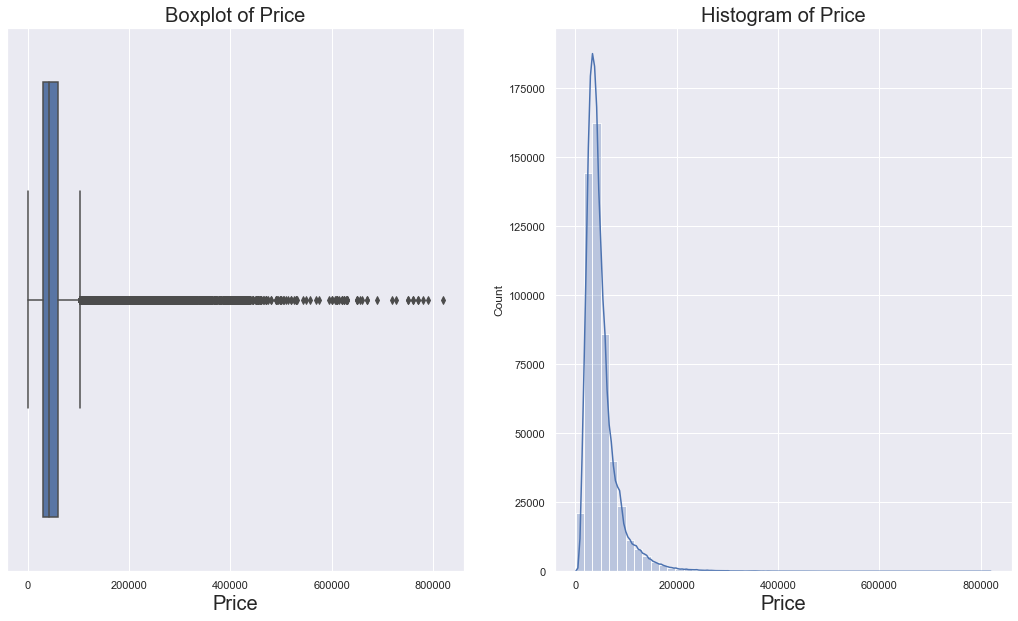

In [12]:
#2-1. 거래가격 분포 확인 

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,10))
price = data.price
g1 = sns.boxplot(data=price, orient='h', ax=ax1)
g2 = sns.histplot(data=price, ax=ax2, bins=50, alpha=0.3, kde=True)

ax1.set_title('Boxplot of Price', fontsize=20)
ax1.set_xlabel('Price', fontsize=20)
g1.set(yticklabels=[]) 
ax2.set_title('Histogram of Price', fontsize=20)
ax2.set_xlabel('Price', fontsize=20)

Text(0, 0.5, 'price')

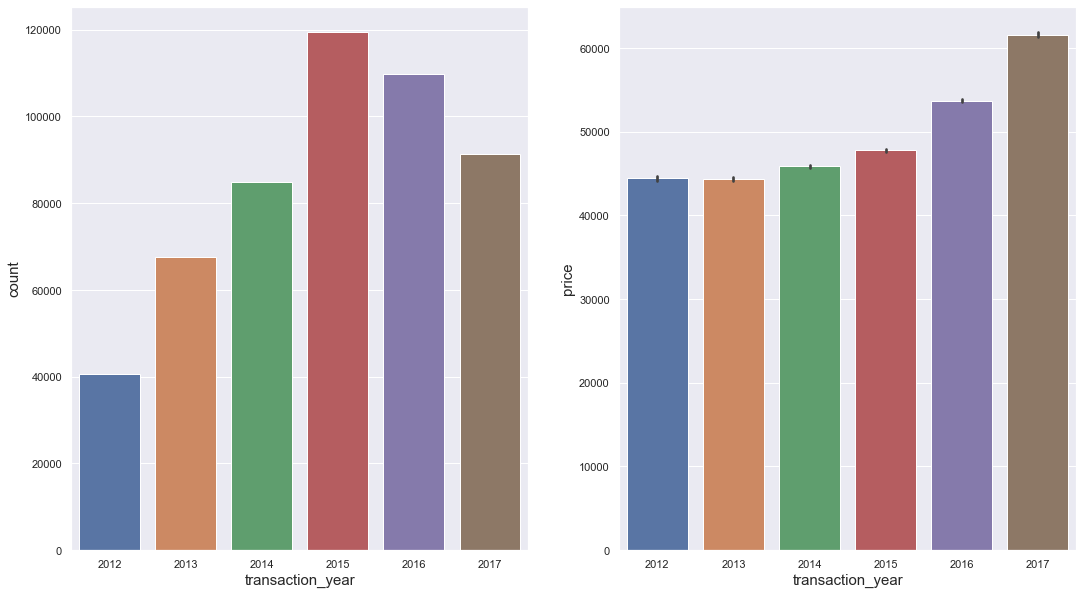

In [13]:
#2-2. 거래연도 분포 확인/거래연도별 가격 분포 확인

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,10))

sns.countplot(data=data, x='transaction_year', ax=ax1)
ax1.set_xlabel('transaction_year', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
sns.barplot(x=data['transaction_year'], y=data['price'], ax=ax2)
ax2.set_xlabel('transaction_year', fontsize=15)
ax2.set_ylabel('price', fontsize=15)

In [14]:
'''좌측 플랏은 거래연도별 거래횟수입니다. 2015년까지 점진적으로 거래횟수가 줄어들다가 2016년부터 거래 횟수가 줄어들었습니다. 우측은 거래연도별 거래 가격에 대한 분포인데, 집값이 정말 상승했군요,,,'''

'좌측 플랏은 거래연도별 거래횟수입니다. 2015년까지 점진적으로 거래횟수가 줄어들다가 2016년부터 거래 횟수가 줄어들었습니다. 우측은 거래연도별 거래 가격에 대한 분포인데, 집값이 정말 상승했군요,,,'

Text(0, 0.5, 'price')

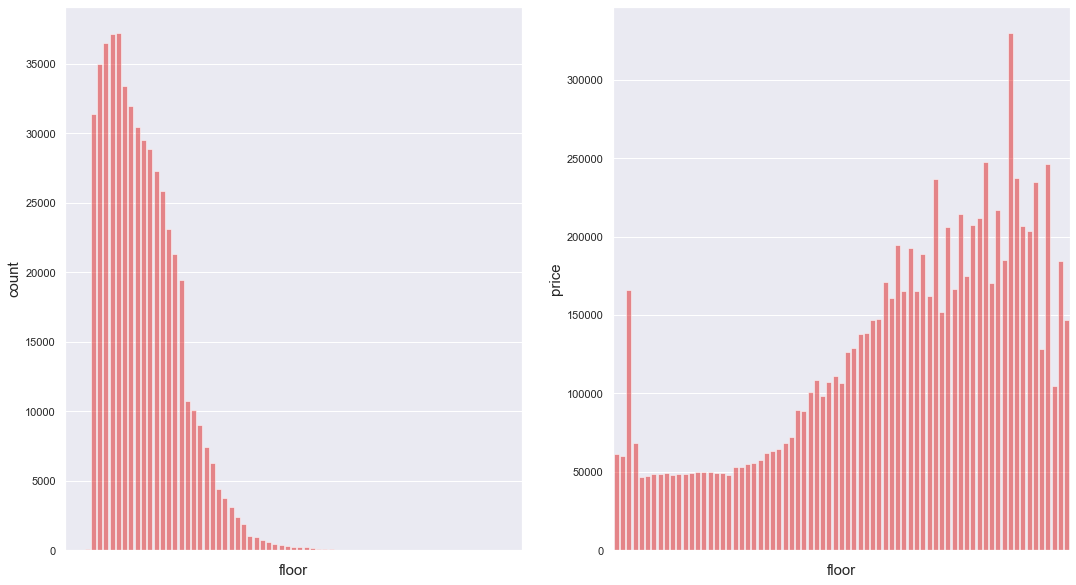

In [15]:
# 2-3. 층 분포 확인/층별 가격 분포 확인

count2 = data.groupby(data['floor']).count()
count2['floor']=count2.index

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,10))

g1 = sns.barplot(data=count2, x='floor', y='index', ax=ax1, color = 'red', alpha=0.5)
g1.set(xticklabels=[]) 
ax1.set_xlabel('floor', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
g2 = sns.barplot(x=data['floor'], y=data['price'], ax=ax2, color = 'red', ci=None, alpha=0.5)
g2.set(xticklabels=[])
ax2.set_xlabel('floor', fontsize=15)
ax2.set_ylabel('price', fontsize=15)

In [16]:
'''좌측은 층별 거래횟수를 나타냅니다. 당연히 높은 층 거주자는 중간 층 거주자보단 outlier이기에 층별 거래횟수는 1층부터 점차 증가하다가 어느 적절한 층을 기점으로 감소합니다. 우측 플랏은 층별 거래 가격대를 확인할 수 있는 플랏인데, 고층일수록 높은 가격대가 형성되는 경향이 확실한 것 같습니다. 그런데 3층의 거래가격이 주변층과 비교해 압도적으로 높은 이유는 아마 3층이 많은이에게 선호되는 층인가봅니다.'''

'좌측은 층별 거래횟수를 나타냅니다. 당연히 높은 층 거주자는 중간 층 거주자보단 outlier이기에 층별 거래횟수는 1층부터 점차 증가하다가 어느 적절한 층을 기점으로 감소합니다. 우측 플랏은 층별 거래 가격대를 확인할 수 있는 플랏인데, 고층일수록 높은 가격대가 형성되는 경향이 확실한 것 같습니다. 그런데 3층의 거래가격이 주변층과 비교해 압도적으로 높은 이유는 아마 3층이 많은이에게 선호되는 층인가봅니다.'

Text(0, 0.5, 'price')

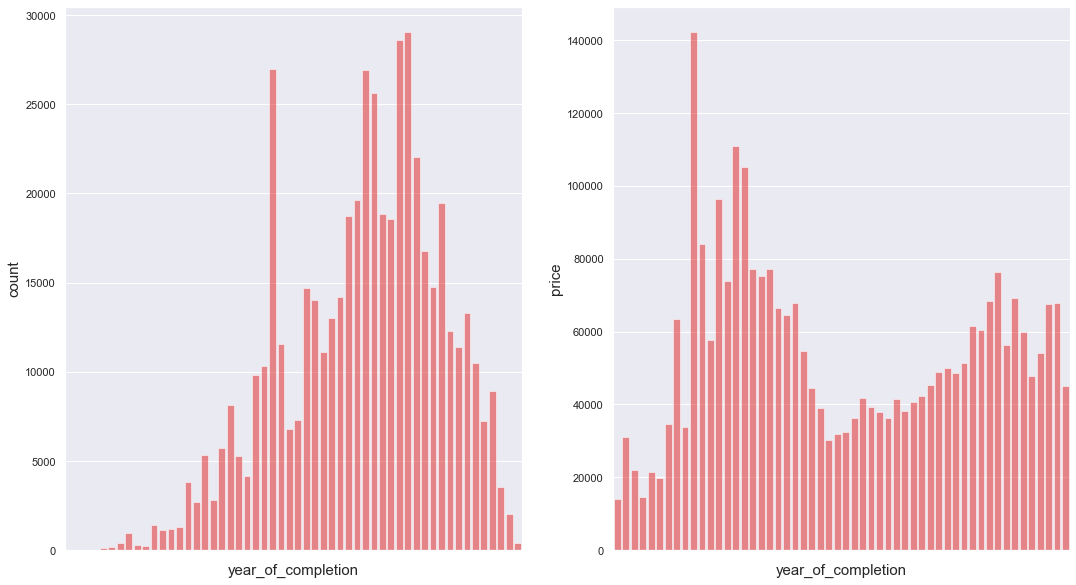

In [17]:
# 2-4. 완공연도 분포 확인/완공연도별 가격 분포 확인

count = data.groupby(data['year_of_completion']).count()
count['year_of_completion'] = count.index
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,10))

g1 = sns.barplot(data=count, x='year_of_completion', y='index', ax=ax1, color='red', alpha=0.5)
g1.set(xticklabels=[]) 
ax1.set_xlabel('year_of_completion', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
g2 = sns.barplot(x=data['year_of_completion'], y=data['price'], ax=ax2, color = 'red', ci=None, alpha=0.5)
g2.set(xticklabels=[])
ax2.set_xlabel('year_of_completion', fontsize=15)
ax2.set_ylabel('price', fontsize=15)

In [18]:
'''플랏을 보니 최근에 만들어진 건물일수록 거래 빈도 자체는 높지만, 오히려 거래가격은 지어진지 시간이 지난 건물의 경우 더 높게 형성되어 있음을 알 수 있습니다.'''

'플랏을 보니 최근에 만들어진 건물일수록 거래 빈도 자체는 높지만, 오히려 거래가격은 지어진지 시간이 지난 건물의 경우 더 높게 형성되어 있음을 알 수 있습니다.'

In [19]:
# 3-1. 아파트 연차 변수 생성

data['until_trans'] = data['transaction_year']-data['year_of_completion']+1


Text(0, 0.5, 'price')

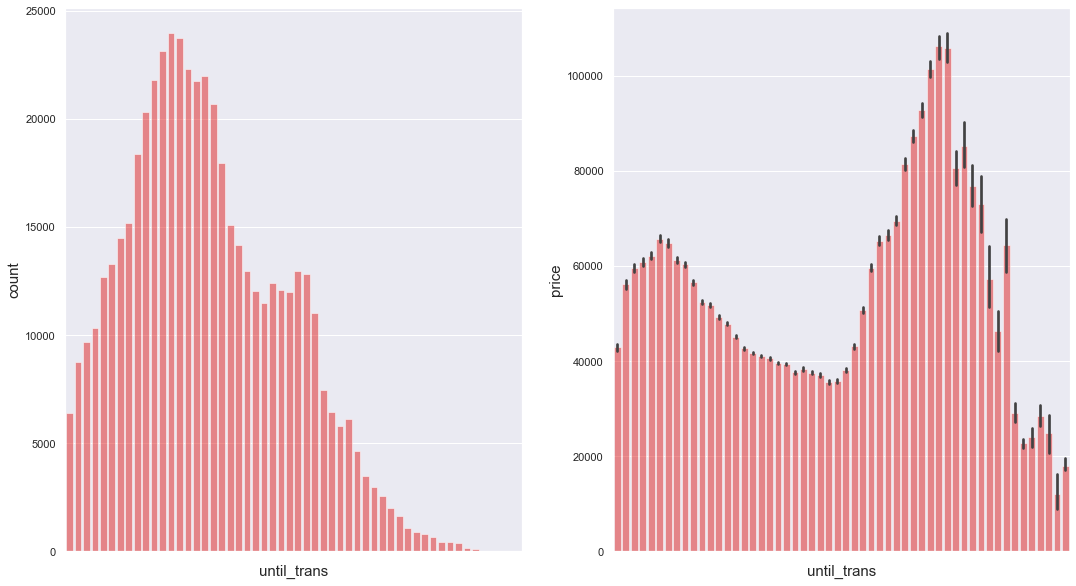

In [20]:
count3 = data.groupby(data['until_trans']).count()
count3['until_trans'] = count3.index

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18,10))

g1 = sns.barplot(data=count3, x='until_trans', y='index', ax=ax1, color='red', alpha=0.5)
g1.set(xticklabels=[]) 
ax1.set_xlabel('until_trans', fontsize=15)
ax1.set_ylabel('count', fontsize=15)
g2 = sns.barplot(x=data['until_trans'], y=data['price'], ax=ax2, color = 'red', alpha=0.5)
g2.set(xticklabels=[])
ax2.set_xlabel('until_trans', fontsize=15)
ax2.set_ylabel('price', fontsize=15)


In [21]:
'''아파트 연차가 오래될수록 거래 건수는 확실히 줄어들지만 오히려 지어진 후 거래가 이루어질 때까지 시간이 꽤 지난 건물들이 높은 가격대에 거래 되었음을 알 수 있습니다.'''

'아파트 연차가 오래될수록 거래 건수는 확실히 줄어들지만 오히려 지어진 후 거래가 이루어질 때까지 시간이 꽤 지난 건물들이 높은 가격대에 거래 되었음을 알 수 있습니다.'

In [22]:
#3-2. 거래 일 변수 변환

data['transaction_date'] = np.where(data['transaction_date']=='1~10', '0', np.where(data['transaction_date']=='11~20', '1', '2'))

In [23]:
# 3-3. 월 변수와 10일 단위 변수 통합
data = data.astype({'transaction_date':'int'})
data = data.astype({'transaction_month':'int'})

data['transaction_month_date']=data['transaction_month']*3+data['transaction_date']
data[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


In [24]:
#3-4. 연도별 주기성을 위한 파생변수 생성(삼각변환)

import math

tdays_in_year=39

data['sin_date'] = np.sin(np.pi*data.transaction_month_date/2)
data['cos_date'] = np.cos(np.pi*data.transaction_month_date/2)
data.head()

,level_0,index,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date,sin_date,cos_date
0,1770,1770,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,2012,1,5,3,-1.000000e+00,-1.836970e-16
1,1771,1771,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,2012,1,5,4,-2.449294e-16,1.000000e+00
2,1772,1772,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,2012,1,5,4,-2.449294e-16,1.000000e+00
3,1773,1773,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,0,8,30500,2012,1,8,3,-1.000000e+00,-1.836970e-16
4,1774,1774,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,15,30500,2012,1,8,5,1.000000e+00,3.061617e-16


In [25]:
'''시기별로 원핫이나 레이블 인코딩을 하면 rough한 거래 일(10일단위로 잡았으므로)에 대한 범주화는 가능할 것입니다. 그러나 시기의 주기성을 파악하지 못하여 문제가 발생합니다'''

'시기별로 원핫이나 레이블 인코딩을 하면 rough한 거래 일(10일단위로 잡았으므로)에 대한 범주화는 가능할 것입니다. 그러나 시기의 주기성을 파악하지 못하여 문제가 발생합니다'

In [26]:
'''따라서 삼각변환을 통해 주기성을 고려하여 인코딩을 해주어야 합니다. 이렇게 해주면 2015년 12월 21일부터 31일까지 거래된 데이터와 2016년 1월 1일부터 10일까지 거래된 데이터 사이 실제로는 10일의 차이만 있지만 인코딩 상으로 355일만큼 차이가 나도록 하는 문제를 예방할 수 있습니다.'''

'따라서 삼각변환을 통해 주기성을 고려하여 인코딩을 해주어야 합니다. 이렇게 해주면 2015년 12월 21일부터 31일까지 거래된 데이터와 2016년 1월 1일부터 10일까지 거래된 데이터 사이 실제로는 10일의 차이만 있지만 인코딩 상으로 355일만큼 차이가 나도록 하는 문제를 예방할 수 있습니다.'

In [27]:
data.drop(['year_of_completion', 'transaction_year_month', 'transaction_date', 'transaction_month', 'transaction_month_date'], axis=1, inplace=True)

In [28]:
# 4-1. 아파트 이름 한글부분만 뽑기
apt = data['apt']
apt = apt.str.replace(pat=r'[^\w]', repl=r'', regex=True)
apt = apt.str.replace(pat=r'[\d]', repl=r'', regex=True)
apt.head()

0    광화문풍림스페이스본
1    광화문풍림스페이스본
2    광화문풍림스페이스본
3      로얄팰리스스위트
4      로얄팰리스스위트
Name: apt, dtype: object

In [29]:
# 4-2. 아파트 이름  DTM

from sklearn.feature_extraction.text import CountVectorizer

aprt_DTM = CountVectorizer(min_df = 5).fit_transform(apt)
print(aprt_DTM)

  (0, 347)	1
  (1, 347)	1
  (2, 347)	1
  (3, 1112)	1
  (4, 1112)	1
  (5, 1112)	1
  (6, 1112)	1
  (7, 3839)	1
  (8, 3839)	1
  (9, 3839)	1
  (10, 2800)	1
  (11, 3245)	1
  (12, 3245)	1
  (13, 839)	1
  (14, 963)	1
  (15, 3245)	1
  (16, 3127)	1
  (17, 933)	1
  (18, 1097)	1
  (19, 1698)	1
  (21, 698)	1
  (22, 347)	1
  (23, 2110)	1
  (24, 3517)	1
  (25, 3418)	1
  :	:
  (513503, 3406)	1
  (513504, 3406)	1
  (513505, 3264)	1
  (513506, 133)	1
  (513507, 3271)	1
  (513508, 1698)	1
  (513509, 3708)	1
  (513510, 3708)	1
  (513511, 1698)	1
  (513512, 585)	1
  (513513, 2749)	1
  (513514, 583)	1
  (513515, 3264)	1
  (513516, 1698)	1
  (513517, 3708)	1
  (513518, 134)	1
  (513519, 167)	1
  (513520, 167)	1
  (513521, 167)	1
  (513522, 167)	1
  (513523, 265)	1
  (513524, 167)	1
  (513525, 167)	1
  (513526, 167)	1
  (513527, 265)	1


In [30]:
#4-3. 아파트 이름 tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5)
aprt_tfidf = tfidf.fit_transform(apt)
print(aprt_tfidf)

  (0, 347)	1.0
  (1, 347)	1.0
  (2, 347)	1.0
  (3, 1112)	1.0
  (4, 1112)	1.0
  (5, 1112)	1.0
  (6, 1112)	1.0
  (7, 3839)	1.0
  (8, 3839)	1.0
  (9, 3839)	1.0
  (10, 2800)	1.0
  (11, 3245)	1.0
  (12, 3245)	1.0
  (13, 839)	1.0
  (14, 963)	1.0
  (15, 3245)	1.0
  (16, 3127)	1.0
  (17, 933)	1.0
  (18, 1097)	1.0
  (19, 1698)	1.0
  (21, 698)	1.0
  (22, 347)	1.0
  (23, 2110)	1.0
  (24, 3517)	1.0
  (25, 3418)	1.0
  :	:
  (513503, 3406)	1.0
  (513504, 3406)	1.0
  (513505, 3264)	1.0
  (513506, 133)	1.0
  (513507, 3271)	1.0
  (513508, 1698)	1.0
  (513509, 3708)	1.0
  (513510, 3708)	1.0
  (513511, 1698)	1.0
  (513512, 585)	1.0
  (513513, 2749)	1.0
  (513514, 583)	1.0
  (513515, 3264)	1.0
  (513516, 1698)	1.0
  (513517, 3708)	1.0
  (513518, 134)	1.0
  (513519, 167)	1.0
  (513520, 167)	1.0
  (513521, 167)	1.0
  (513522, 167)	1.0
  (513523, 265)	1.0
  (513524, 167)	1.0
  (513525, 167)	1.0
  (513526, 167)	1.0
  (513527, 265)	1.0


In [31]:
# 4-4. 문제점
'''1) DTM: 등장하는 단어 중에 카운트는 많이 되지만 의미 없는 단어가 있을 수 있습니다. 예를 들면 조사 등이 그러합니다. 이는 성능 저하의 원인이 됩니다.'''

'1) DTM: 등장하는 단어 중에 카운트는 많이 되지만 의미 없는 단어가 있을 수 있습니다. 예를 들면 조사 등이 그러합니다. 이는 성능 저하의 원인이 됩니다.'

In [32]:

'''2)TFIDF: TFIDF는 단어의 빈도에 대해 비율적으로 중요도를 고려하니 DTM보다는 유의미합니다. 그러나 역시 반복되는 단어가 많은 경우엔 성능이 좋지 않을테고 특히 한글의 경우 거의 동일한 의미의 단어임에도 불구하고 붙어있는 조사 등으로 인해 다른 토큰으로 카운트를 할 경우 전처리가 힘들어질 수 있을 것 같습니다.'''

'2)TFIDF: TFIDF는 단어의 빈도에 대해 비율적으로 중요도를 고려하니 DTM보다는 유의미합니다. 그러나 역시 반복되는 단어가 많은 경우엔 성능이 좋지 않을테고 특히 한글의 경우 거의 동일한 의미의 단어임에도 불구하고 붙어있는 조사 등으로 인해 다른 토큰으로 카운트를 할 경우 전처리가 힘들어질 수 있을 것 같습니다.'

In [33]:
# 5. 인코딩
data = data.drop(columns=['addr_kr'])

In [34]:
#5-1. 원핫 인코딩
dong_onehot = pd.get_dummies(data['dong'])
dong_onehot

,가락동,가리봉동,가산동,가양동,갈월동,갈현동,강일동,개봉동,개포동,거여동,...,황학동,회기동,회현동1가,회현동2가,효제동,효창동,후암동,휘경동,흑석동,흥인동
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513524,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513525,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513526,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
apt_onehot = pd.get_dummies(data['apt'])
apt_onehot

,(1-10),(1-102),(1-35),(1101-1),(115-4),(115-5),(124-12),(13-21),(145-0),(1544-0),...,힐탑,힐탑아파트3차(894-3),힐탑아파트4차(894-5),힐탑이루미,힐탑트레져1동,힐튼,힐튼빌리지1차,힐튼빌리지2차,힐하우스,힐하우스(802-3)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513523,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
print(dong_onehot.shape)
print(apt_onehot.shape)

(513528, 329)
(513528, 6765)


In [37]:
'''원핫 인코딩은 단어의 개수가 늘어날수록 벡터를 저장해야 할 공간 역시 늘어나게 됩니다. 이는 저장공간 차원에서 매우 비효율적입니다. 아파트 변수만 하더라도 one-hot encoding에 수초의 시간이 걸리는 걸 보면 성능이 그리 좋지 않습니다. 또 이 상황에서 부적절한 이유로 여겨질지는 모르겠지만 원핫인코딩은 단어간의 유사도에 대한 고려가 전혀 없는 것 같습니다.'''

'원핫 인코딩은 단어의 개수가 늘어날수록 벡터를 저장해야 할 공간 역시 늘어나게 됩니다. 이는 저장공간 차원에서 매우 비효율적입니다. 아파트 변수만 하더라도 one-hot encoding에 수초의 시간이 걸리는 걸 보면 성능이 그리 좋지 않습니다. 또 이 상황에서 부적절한 이유로 여겨질지는 모르겠지만 원핫인코딩은 단어간의 유사도에 대한 고려가 전혀 없는 것 같습니다.'

In [38]:
# 5-2 레이블 인코딩

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data.transaction_year)
labels = le.transform(data.transaction_year)
data['transaction_year'] = labels
data.transaction_year.head()

0    0
1    0
2    0
3    0
4    0
Name: transaction_year, dtype: int64

In [39]:
'''transaction_year의 범주가 2012년부터 2017년까지 순차적으로 존재기 때문에 연도 자체를 하나의 범주로 생각해 레이블 인코딩하는 방법은 이 데이터에서 적절해보입니다.'''

'transaction_year의 범주가 2012년부터 2017년까지 순차적으로 존재기 때문에 연도 자체를 하나의 범주로 생각해 레이블 인코딩하는 방법은 이 데이터에서 적절해보입니다.'

In [40]:
#5-3. 레이블 인코딩

data = data.drop(['level_0', 'index'], axis='columns')
data_label = data
le.fit(data.dong)
data_label['dong'] = le.transform(data.dong)
le.fit(data.apt)
data_label['apt'] = le.transform(data.apt)
data_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,805,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,130,805,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,130,805,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,164,2042,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,164,2042,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


In [42]:
'''아파트 각 이름을 범주화해 인코딩할 수는 있지만 인코딩한 결과에서 어떠한 유의미함도 발견할 수가 없습니다. 아파트 이름을 인코딩하려는 이유 자체가 아파트 이름에서의 가격 차이 등 유용한 정보를 추출할 수 있지 않을까 하는 기대감 때문인데 그러한 요구를 충족하지 못합니다.'''

'아파트 각 이름을 범주화해 인코딩할 수는 있지만 인코딩한 결과에서 어떠한 유의미함도 발견할 수가 없습니다. 아파트 이름을 인코딩하려는 이유 자체가 아파트 이름에서의 가격 차이 등 유용한 정보를 추출할 수 있지 않을까 하는 기대감 때문인데 그러한 요구를 충족하지 못합니다.'

In [41]:
#5-4. mean 인코딩

data_mean = data_label
means = data_mean.groupby('apt').mean()
means['price']
data_mean.loc[:, 'apt'] = data['apt'].map(means['price'])
data_mean.head()


,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,91174.766355,95.88,6,70000,0,5,-1.000000e+00,-1.836970e-16
1,130,91174.766355,108.55,11,100500,0,5,-2.449294e-16,1.000000e+00
2,130,91174.766355,94.51,1,65800,0,5,-2.449294e-16,1.000000e+00
3,164,36609.649123,42.87,8,30500,0,8,-1.000000e+00,-1.836970e-16
4,164,36609.649123,39.67,15,30500,0,8,1.000000e+00,3.061617e-16


In [43]:
'''가격의 평균을 아파트 이름 범주별로 대입해주는 인코딩 방식이 지금까지의 방식 중엔 가장 적절해보입니다. 아파트 이름별로 평균 거래가격을 알 수 있기 때문입니다. 그런데 문제는 그래서 어떤 이름을 가진 아파트들이 높은 가격에 거래되는지를 알 수가 없습니다. 레이블 인코딩과 mean 인코딩을 적절히 혼합하는 방법은 없을까요,,'''

'가격의 평균을 아파트 이름 범주별로 대입해주는 인코딩 방식이 지금까지의 방식 중엔 가장 적절해보입니다. 아파트 이름별로 평균 거래가격을 알 수 있기 때문입니다. 그런데 문제는 그래서 어떤 이름을 가진 아파트들이 높은 가격에 거래되는지를 알 수가 없습니다. 레이블 인코딩과 mean 인코딩을 적절히 혼합하는 방법은 없을까요,,'